## Atividade 

Utilize um dos livros disponíveis no moodle ou qualquer outra obra com pelo menos umas 80 páginas para essa atividade.
* Faça o processo de pré-processamento, quebrando o texto em parágrafos ou sentenças e removendo stopwords, símbolos e pontuações (cuidado com nomes, personagens, lugares etc).
* O que a matriz de co-ocorrência pode nos revelar? Para duas, três e quatro palavras? (considere os 10 resultados mais frequentes).
* O que o modelo de regras pode nos revelar?
* O que o modelo vetorial pode nos revelar? (https://www.tensorflow.org/tutorials/text/word2vec)
* O que a PCA nos revela do modelo vetorial?
* Qual a diferença de resultado de uma clusterização de k-mens para uma clusterização db-scamem cima dos resultados do modelo vetorial?

In [1]:
# !pip install apyori
from unidecode import unidecode
from apyori import apriori
import pandas as pd
import re

### Carregando o livro

In [2]:
book = 'alice_no_pais_das_maravilhas-lewis_carroll.txt'
file = open(book, "r", encoding="utf8")
text_book = file.read()

### Pré-processamento

In [3]:
text_book = unidecode(text_book)
text_book = text_book.lower()
text_book = text_book.replace('\n', ' ')

text_book_new = ""
for character in text_book:
    if character.isalnum() or character in [' ', '.', ',']:
        text_book_new += character
text_book = text_book_new        
del text_book_new

In [4]:
frases = text_book.split(sep='.')
for i in range(0,len(frases)):
  frases[i] = re.sub(r'==.*?==+', '', frases[i])

In [5]:
stop_words = [
    'houver', 'hei', 'serei', 'teremos', 'voces', 'lhe', 'estava', 'minhas', 'ja', 'este', 'nem', 'tivermos',
    'hao', 'estivessemos', 'estavam', 'houveremos', 'dela', 'nao', 'nosso', 'tenhamos', 'fui', 'houvessemos',
    'uma', 'ao', 'tivessemos', 'serao', 'ou', 'fomos', 'estao', 'teriam', 'tenha', 'nas', 'ate', 'sejamos',
    'estivermos', 'tua', 'estamos', 'seria', 'para', 'fossemos', 'com', 'ela', 'fora', 'dele', 'muito', 'teriamos',
    'de', 'seus', 'o', 'e', 'ele', 'meus', 'eramos', 'tambem', 'estejam', 'tiverem', 'no', 'nossos', 'minha',
    'mas', 'sera', 'teus', 'eram', 'nossa', 'tivesse', 'a', 'estivesse', 'nossas', 'esse', 'suas', 'aquelas',
    'sua', 'ter', 'delas', 'quando', 'houvessem', 'tive', 'em', 'das', 'estiverem', 'eu', 'estavamos', 'somos',
    'voce', 'hajam', 'teve', 'houvesse', 'mesmo', 'fosse', 'houveria', 'na', 'tivemos', 'num', 'ha', 'as',
    'estiver', 'tenham', 'deles', 'pela', 'foram', 'estiveramos', 'meu', 'foramos', 'sejam', 'terei', 'aos',
    'teria', 'ser', 'foi', 'seja', 'essas', 'tera', 'tivera', 'seriamos', 'eles', 'pelas', 'estivemos', 'vos',
    'te', 'seriam', 'da', 'esteve', 'os', 'isso', 'isto', 'aquilo', 'como', 'houve', 'havemos', 'so', 'tenho',
    'qual', 'do', 'quem', 'temos', 'elas', 'que', 'esteja', 'teu', 'fossem', 'nos', 'tinhamos', 'era', 'aquela',
    'esta', 'estivessem', 'se', 'entre', 'pelos', 'estiveram', 'houverei', 'formos', 'houvermos', 'houverao', 'essa',
    'houveriam', 'pelo', 'houveram', 'tu', 'tiver', 'houveriamos', 'esses', 'for', 'tiveramos', 'lhes', 'forem',
    'terao', 'sem', 'tinha', 'houvemos', 'aqueles', 'tiveram', 'sao', 'estivera', 'hajamos', 'estas', 'tinham',
    'houveramos', 'tuas', 'me', 'havia', 'estes', 'depois', 'estive', 'houverem', 'estejamos', 'haja', 'aquele',
    'sou', 'tem', 'tivessem', 'seu', 'mais', 'numa', 'houvera', 'seremos', 'um', 'estou', 'por', 'dos'
]

In [6]:
novasFrases = list()
for i in range(0,len(frases)):
  palavras = re.split('[^\w]',frases[i])
  nova = []
  for pal in palavras:
    lower_pal = pal.lower()
    if len(pal) < 2:
      continue
    if lower_pal in stop_words:
      continue
    nova.append(lower_pal)
  if len(nova)>1:
    novasFrases.append( nova )

## apriori

In [7]:
rules = apriori(novasFrases, min_support = 0.004, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)
results = pd.DataFrame(results)

In [8]:
results.head(10)

,items,support,ordered_statistics
0,"(tempo, algum)",0.005414,"[((algum), (tempo), 0.35000000000000003, 9.051)]"
1,"(coisa, alguma)",0.008507,"[((alguma), (coisa), 0.55, 17.778750000000002)..."
2,"(minutos, alguns)",0.005414,"[((alguns), (minutos), 0.5833333333333334, 39...."
3,"(rainha, ali)",0.004640,"[((ali), (rainha), 0.2727272727272727, 4.89772..."
4,"(voz, alta)",0.008507,"[((alta), (voz), 1.0, 24.39622641509434), ((vo..."
5,"(altura, centimetros)",0.004640,"[((altura), (centimetros), 0.3157894736842105,..."
6,"(altura, meio)",0.005414,"[((altura), (meio), 0.3684210526315789, 23.818..."
7,"(voz, baixa)",0.006187,"[((baixa), (voz), 0.8, 19.516981132075472)]"
8,"(bem, ouvir)",0.005414,"[((ouvir), (bem), 0.4375, 7.07109375)]"
9,"(bem, sei)",0.005414,"[((sei), (bem), 0.25, 4.040625)]"


In [9]:
results.tail(10)

,items,support,ordered_statistics
82,"(disse, si, mesma)",0.012374,"[((mesma), (disse, si), 0.3404255319148936, 24..."
83,"(tartaruga, falsa, enquanto)",0.004640,"[((falsa, enquanto), (tartaruga), 1.0, 23.9444..."
84,"(tartaruga, falsa, entao)",0.005414,"[((falsa, entao), (tartaruga), 1.0, 23.9444444..."
85,"(tartaruga, grifo, falsa)",0.005414,"[((grifo, falsa), (tartaruga), 1.0, 23.9444444..."
86,"(tartaruga, falsa, mar)",0.005414,"[((mar), (tartaruga, falsa), 0.368421052631578..."
87,"(respondeu, falsa, tartaruga)",0.004640,"[((respondeu, falsa), (tartaruga), 1.0, 23.944..."
88,"(disse, voz, alta, alice)",0.004640,"[((alta), (disse, voz, alice), 0.5454545454545..."
89,"(disse, tartaruga, falsa, alice)",0.005414,"[((falsa, alice), (disse, tartaruga), 0.777777..."
90,"(disse, mesma, si, alice)",0.006187,"[((si), (disse, alice, mesma), 0.2162162162162..."
91,"(disse, tartaruga, falsa, entao)",0.004640,"[((disse, entao), (tartaruga, falsa), 0.230769..."


## frequencia

In [10]:
def showDic(dicio,numShow):
  freqsVal = dicio.values()
  freqs = list(freqsVal)
  freqs.sort(reverse=True)
  qdade = 0
  # lista os 10 itens mais frequentes
  for freq in freqs:
    for k,v in dicio.items():
      if v == freq:
        print(k," - ",freq)
        qdade = qdade + 1
        if qdade>=numShow:
          break
    if qdade>=numShow:
      break

In [11]:
# frequencia simples
dicio = {}
dicio2 = {}
dicio3 = {}
dicio4 = {}
for i in range(0,len(frases)):
  palavras = re.split('[^\w]',frases[i])
  nova = []
  for pal in palavras:
    lower_pal = pal.lower()
    if len(pal) < 2:
      continue
    if lower_pal in stop_words:
      continue
    # uma palavra, contagem simples e direta  
    if lower_pal in dicio:
      dicio[lower_pal] = dicio[lower_pal] + 1
    else:
      dicio[lower_pal] = 1
    nova.append( lower_pal )
  # duas palavras
  if len(nova)>1:
    for i in range(0,len(nova)-1):
      dupla = str(nova[i]) + ' ' + str(nova[i+1])
      if dupla in dicio2:
        dicio2[dupla] = dicio2[dupla] + 1
      else:
        dicio2[dupla] = 1
  # tres palavras
  if len(nova)>2:
    for i in range(0,len(nova)-2):
      tripla = str(nova[i]) + ' ' + str(nova[i+1]) + ' ' + str(nova[i+2])
      if tripla in dicio3:
        dicio3[tripla] = dicio3[tripla] + 1
      else:
        dicio3[tripla] = 1
  # quatro palavras
  if len(nova)>2:
    for i in range(0,len(nova)-3):
      quad = str(nova[i]) + ' ' + str(nova[i+1]) + ' ' + str(nova[i+2]) + ' ' + str(nova[i+3])
      if quad in dicio4:
        dicio4[quad] = dicio4[quad] + 1
      else:
        dicio4[quad] = 1

In [12]:
print("Uma palavra")
showDic(dicio,10)
print()

print("Duas palavras")
showDic(dicio2,10)
print()

print("Três palavras")
showDic(dicio3,10)
print()

print("Quatro palavras")
showDic(dicio4,10)

Uma palavra
alice  -  410
disse  -  319
entao  -  86
bem  -  81
vez  -  80
rainha  -  76
enquanto  -  69
nada  -  66
tudo  -  66
nada  -  66

Duas palavras
disse alice  -  70
falsa tartaruga  -  56
disse rei  -  33
outra vez  -  30
lebre marco  -  30
outra vez  -  30
lebre marco  -  30
si mesma  -  27
pensou alice  -  26
coelho branco  -  22

Três palavras
disse falsa tartaruga  -  18
disse si mesma  -  9
alice si mesma  -  7
disse lebre marco  -  7
alice si mesma  -  7
disse lebre marco  -  7
disse alice si  -  6
dizendo si mesma  -  5
vais entrar danca  -  5
dizendo si mesma  -  5

Quatro palavras
disse alice si mesma  -  6
vais vais vais entrar  -  4
vais vais entrar danca  -  4
vais vais vais entrar  -  4
vais vais entrar danca  -  4
disse alice voz alta  -  3
claro disse falsa tartaruga  -  3
vais entrar danca vais  -  3
entrar danca vais vais  -  3
danca vais vais vais  -  3


## word2vec

In [25]:
# ! pip install gensim
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

In [14]:
model = Word2Vec(sentences=novasFrases, vector_size=3786, window=5, min_count=1, workers=4)
model.train(novasFrases, total_examples=len(novasFrases), epochs=10)

(124841, 135670)

In [15]:
df = pd.DataFrame(model.wv[model.wv.index_to_key])
df.index = model.wv.index_to_key

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785
alice,0.188875,0.021001,-0.070585,-0.153354,-0.124659,0.013278,0.078876,-0.124316,-0.044061,-0.015494,...,0.030665,-0.072715,-0.145733,0.109658,-0.017242,-0.066916,-0.081404,0.073141,0.116079,-0.122808
disse,0.145657,0.016070,-0.054561,-0.118521,-0.095634,0.010531,0.060407,-0.095966,-0.033415,-0.011826,...,0.023738,-0.056262,-0.111847,0.084294,-0.013379,-0.051693,-0.062465,0.056626,0.089504,-0.094860
entao,0.129446,0.014574,-0.048519,-0.105170,-0.085080,0.008910,0.053734,-0.084975,-0.030097,-0.010737,...,0.021169,-0.050061,-0.099640,0.074608,-0.011681,-0.045884,-0.055462,0.049922,0.079249,-0.084394
bem,0.137748,0.015373,-0.051480,-0.112006,-0.090492,0.009649,0.057503,-0.091185,-0.032275,-0.011013,...,0.022767,-0.053235,-0.106270,0.079954,-0.012530,-0.049002,-0.059450,0.053477,0.085030,-0.089807
vez,0.131231,0.014077,-0.049161,-0.106585,-0.086208,0.009593,0.054222,-0.086298,-0.030493,-0.010569,...,0.021053,-0.050910,-0.100892,0.076208,-0.011985,-0.046426,-0.056009,0.050505,0.080197,-0.084943


In [44]:
#Computing the correlation matrix
df_corr = df.corr()
X_corr=df_corr

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(df_corr,new_vectors)

In [49]:
X_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785
0,1.000000,0.996772,-0.999669,-0.999897,-0.999867,0.992378,0.999731,-0.999875,-0.999234,-0.994382,...,0.998525,-0.999692,-0.999895,0.999842,-0.995275,-0.999650,-0.999745,0.999710,0.999856,-0.999870
1,0.996772,1.000000,-0.996529,-0.996732,-0.996729,0.988950,0.996573,-0.996724,-0.996032,-0.991132,...,0.995358,-0.996491,-0.996729,0.996694,-0.991850,-0.996492,-0.996570,0.996592,0.996694,-0.996716
2,-0.999669,-0.996529,1.000000,0.999659,0.999629,-0.992152,-0.999485,0.999621,0.998989,0.994050,...,-0.998274,0.999462,0.999639,-0.999593,0.994974,0.999413,0.999494,-0.999459,-0.999616,0.999632
3,-0.999897,-0.996732,0.999659,1.000000,0.999852,-0.992365,-0.999722,0.999850,0.999222,0.994342,...,-0.998496,0.999680,0.999874,-0.999830,0.995283,0.999637,0.999726,-0.999694,-0.999836,0.999843
4,-0.999867,-0.996729,0.999629,0.999852,1.000000,-0.992366,-0.999677,0.999822,0.999187,0.994326,...,-0.998494,0.999645,0.999845,-0.999789,0.995216,0.999604,0.999706,-0.999662,-0.999810,0.999816


In [51]:
neww_X[:,0]

array([-60.73060116, -60.53918546,  60.71569025, ..., -60.71772279,
       -60.72674191,  60.72734479])

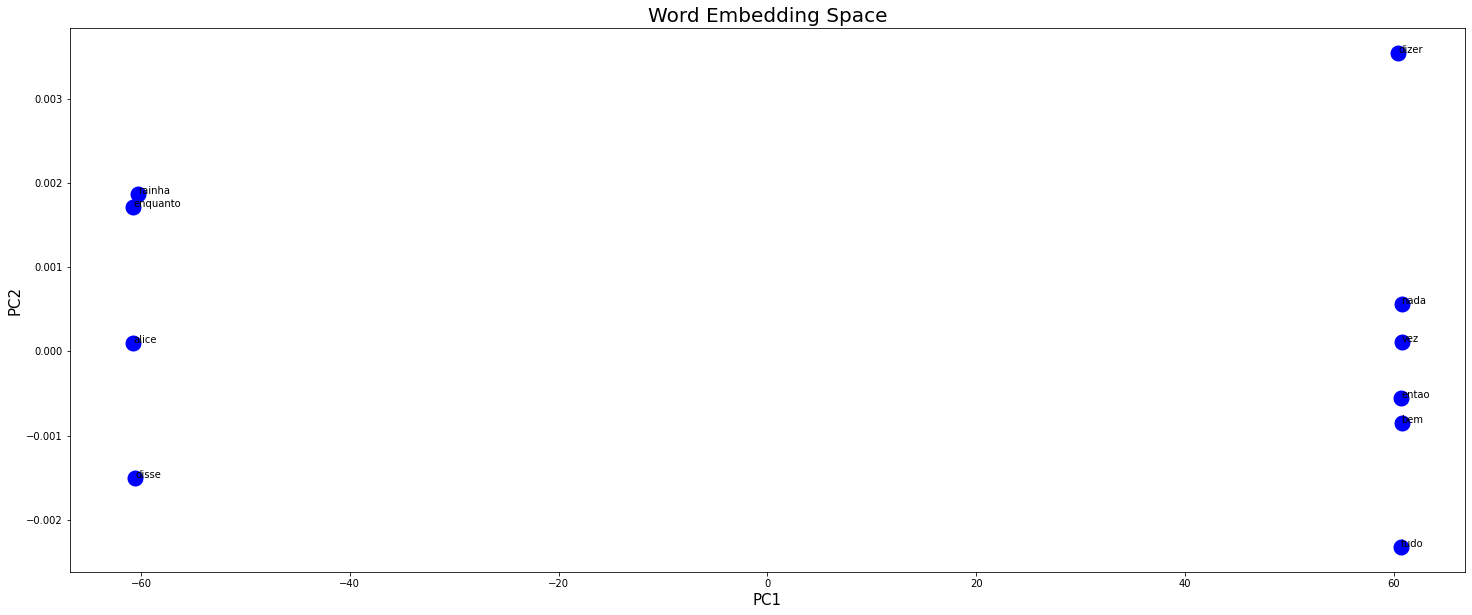

In [59]:
n_words = 10

plt.figure(figsize=(25,10))
plt.scatter(neww_X[:n_words,0],neww_X[:n_words,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.index_to_key[:n_words])
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

## kmeans

In [155]:
# !pip install scikit-learn
from sklearn.cluster import KMeans

In [158]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

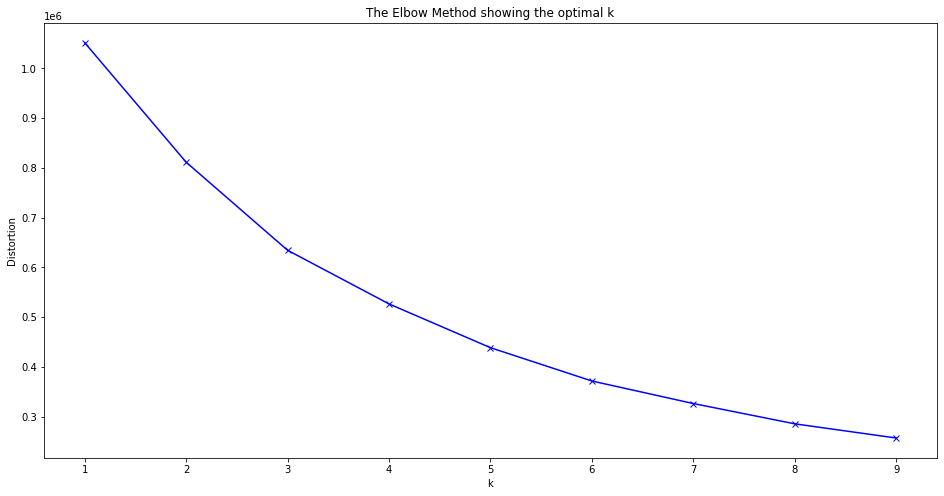

In [159]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [167]:
label = KMeans(n_clusters=3).fit_predict(df)

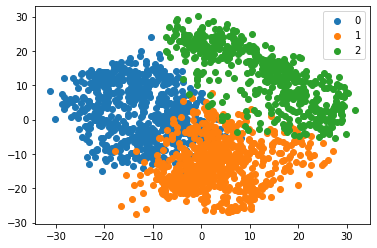

In [168]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

---

In [170]:
 from sklearn.cluster import DBSCAN

In [181]:
db = DBSCAN().fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [183]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [184]:
n_clusters_

0

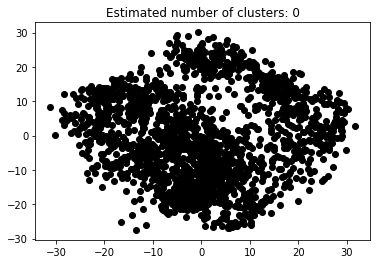

In [186]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### O DBSCAN NÃO GEROU NENUM CLUSTER